In [ ]:
import pandas as pd
df_y=pd.read_csv('glyco2.csv')
# df_y=df_y["Exp. % MGS"]
df_y.tail()


,Name,SMILES,Concentration (mM),Exp. % MGS
218,n-decyl-2-(α-d-galactopyranosyl)ethylamide,O[C@H]([C@@H]1O)[C@H](O[C@@H]([C@@H]1O)CC(NCCC...,5.5,28.6
219,n-dodecyl-2-(α-d-galactopyranosyl)ethylamide,O[C@H]([C@@H]1O)[C@H](O[C@@H]([C@@H]1O)CC(NCCC...,0.55,60.6
220,n-tetradecyl-2-(α-d-galactopyranosyl)ethylamide,O[C@H]([C@@H]1O)[C@H](O[C@@H]([C@@H]1O)CC(NCCC...,0.055,57.4
221,n-hexadecyl-2-(α-d-galactopyranosyl)ethylamide,O[C@H]([C@@H]1O)[C@H](O[C@@H]([C@@H]1O)CC(NCCC...,0.055,54.0
222,"n-(3,5-difluorobenzyl)-d-gluconamide",OC[C@H]([C@H]([C@@H]([C@H](C(NCc1cc(F)cc(F)c1)...,22,71.4


In [ ]:
std_glyco2 = pd.read_csv('std_glyco2.csv')
df_X = std_glyco2.iloc[:, 1:]
df_X.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,2.91993,1039.05491,-1.38,-1.1261,286.10525,1.30000,0.22872,0.53846,4,7,...,4,2,9,0,1,1,0.83637,701.41218,0.20035,108.61
1,2.91993,1039.05491,-1.38,-1.1261,286.10525,1.30000,0.22872,0.53846,4,7,...,4,2,9,0,1,1,0.76051,763.51882,0.18407,108.61
2,2.91993,1039.05491,-1.38,-1.1261,286.10525,1.30000,0.22872,0.53846,4,7,...,4,2,9,0,1,1,0.85388,660.10683,0.19770,108.61
3,2.91993,1039.05491,-1.38,-1.1261,286.10525,1.30000,0.22872,0.53846,4,7,...,4,2,9,0,1,1,1.02256,811.73801,0.27003,108.61
4,2.95217,939.29243,-0.70,-0.3722,334.00520,1.31579,0.22872,0.50000,4,6,...,4,2,7,0,1,1,0.65957,803.30071,0.15379,99.38


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from keras.optimizers import Adagrad,Nadam,Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [ ]:
def create_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Dense(60, activation='relu')(inputs)
    x = Dense(60, activation='relu')(x)
    x = Dense(60, activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Nadam(learning_rate=0.01), loss='mse',)
    return model

In [ ]:
train_df_y = df_y[:-30]
test_df_y = df_y[-30:]
train_df_x = df_X[:-30]
test_df_x = df_X[-30:]

In [ ]:
len(train_df_y),len(test_df_y)

(193, 30)

In [ ]:
# on whole model
y = train_df_y["Exp. % MGS"].values.flatten()
X= train_df_x.values
input_shape = (X.shape[1],)
model_std = create_model(input_shape)
model_std.fit(X, y, epochs=300, batch_size=32, verbose=1)
std_pred = model_std.predict(test_df_x)

mse = np.mean((std_pred.flatten() - test_df_y['Exp. % MGS'])**2)
pcc, _ = pearsonr(test_df_y['Exp. % MGS'], std_pred.flatten())
mse,pcc

Epoch 1/300
7/7 [==============================] - 3s 15ms/step - loss: 14652.9922
Epoch 2/300
7/7 [==============================] - 0s 18ms/step - loss: 2469.5940
Epoch 3/300
7/7 [==============================] - 0s 13ms/step - loss: 1903.8945
Epoch 4/300
7/7 [==============================] - 0s 13ms/step - loss: 1028.0819
Epoch 5/300
7/7 [==============================] - 0s 8ms/step - loss: 1062.5107
Epoch 6/300
7/7 [==============================] - 0s 9ms/step - loss: 1169.0304
Epoch 7/300
7/7 [==============================] - 0s 7ms/step - loss: 1162.0287
Epoch 8/300
7/7 [==============================] - 0s 8ms/step - loss: 1047.4974
Epoch 9/300
7/7 [==============================] - 0s 7ms/step - loss: 960.8292
Epoch 10/300
7/7 [==============================] - 0s 6ms/step - loss: 1035.5507
Epoch 11/300
7/7 [==============================] - 0s 6ms/step - loss: 924.6185
Epoch 12/300
7/7 [==============================] - 0s 6ms/step - loss: 1341.8157
Epoch 13/300
7/7 [====

(331.17385036621704, 0.4492320024264583)

In [ ]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.0 MB/s eta 0:00:00


In [ ]:
X = df_X.values
# masker = shap.maskers.Independent(data=X)
explainer = shap.KernelExplainer(model_std,X)
shap_values = explainer.shap_values(X)

  0%|          | 0/223 [00:00<?, ?it/s]

In [ ]:
shap_values = np.reshape(shap_values, (223,45))
np.shape(shap_values.data)

(223, 45)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[21])

In [ ]:
explainer.expected_value

array([55.28672091])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values)

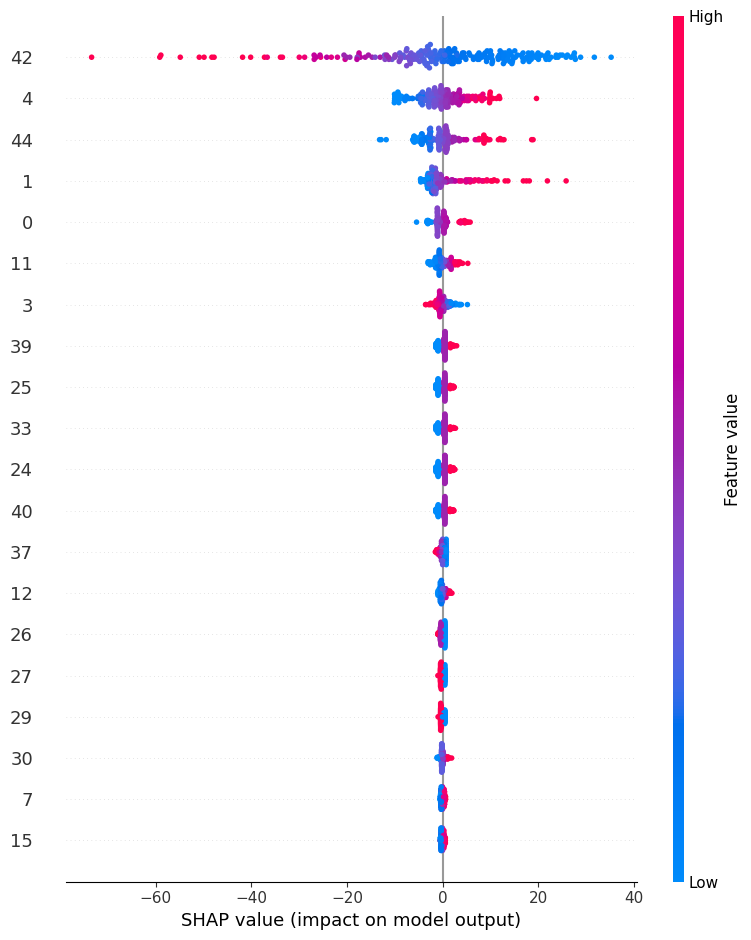

In [ ]:
exp = shap.Explanation(shap_values, data = X, feature_names=df_X.columns)
shap.summary_plot(exp)

In [ ]:
shap_df = pd.DataFrame(shap_values)
shap_df.shape

(223, 45)

In [ ]:
shap_df

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-1.093956,-1.598906,-0.074960,-0.605957,-1.717261,-0.032685,-0.047532,-0.259816,-0.295294,-0.024675,...,-0.198365,0.339961,0.412007,0.000000,0.510891,0.474348,-0.107759,14.075545,-0.207905,-2.689530
1,-1.078210,-1.795709,-0.095023,-0.600491,-1.725184,-0.043097,-0.042174,-0.265396,-0.268230,-0.019795,...,-0.155518,0.320259,0.420760,-0.009839,0.533542,0.478620,-0.186947,10.352099,-0.266527,-2.696044
2,-1.058144,-1.489879,-0.073036,-0.590519,-1.621603,-0.058822,-0.049377,-0.270112,-0.296828,-0.041527,...,-0.185466,0.315295,0.416887,0.000000,0.510664,0.470122,-0.131573,16.483453,-0.211476,-2.667117
3,-1.062175,-2.010917,-0.090192,-0.609311,-1.756288,-0.031776,-0.030976,-0.258306,-0.276378,-0.032750,...,-0.141533,0.277394,0.391181,-0.019432,0.520414,0.433956,0.096217,7.632547,-0.031592,-2.717946
4,-1.058382,-2.414201,0.102239,-1.352771,2.913127,-0.007947,-0.023025,-0.308716,-0.307644,-0.197659,...,-0.184249,0.311023,0.777391,0.023921,0.490135,0.457655,-0.298992,8.321474,-0.354161,-4.399918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0.476295,5.413771,0.068861,-1.466285,3.723056,-0.239347,0.000000,0.324612,0.000000,0.000000,...,0.000000,-0.077387,-0.670373,0.000000,0.279881,0.292316,0.105809,-14.717176,-0.142820,-0.442144
219,0.523814,8.366161,0.059287,-1.932827,5.452646,-0.317533,0.000000,0.285679,0.000000,0.000000,...,0.000000,-0.054973,-0.913054,0.000000,0.285497,0.294363,0.046347,-15.500414,-0.320507,-0.514147
220,0.581353,13.687109,0.099374,-2.500035,6.931075,-0.532262,-0.124418,0.412307,0.000000,0.073327,...,0.000000,-0.160839,-1.154734,-0.183686,0.177768,0.341681,0.450148,-41.839363,0.484536,-0.618982
221,0.580292,16.920259,0.207343,-2.718226,7.761823,-0.375739,0.058622,0.370501,0.000000,0.000000,...,0.079963,0.167847,-1.411082,0.000000,0.136636,0.548607,0.357693,-48.265359,0.000000,-0.484138


In [ ]:
mod_sum=shap_df.abs().sum()/60
mod_sum = pd.DataFrame(mod_sum, columns=['weight'])
mod_sum['Property'] = [f'Property {i+1}' for i in range(shap_df.shape[1])]
mod_sum = mod_sum[['Property', 'weight']]

<BarContainer object of 45 artists>

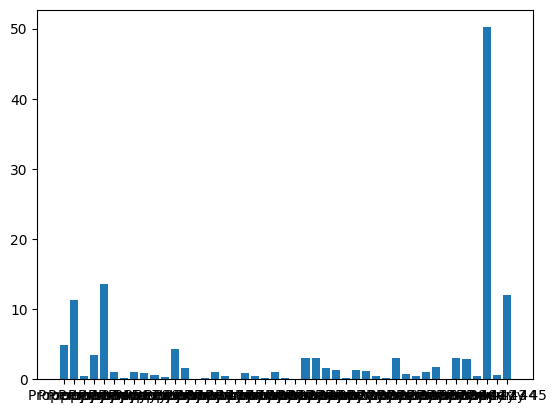

In [ ]:
plt.bar(mod_sum['Property'], mod_sum['weight'])

In [ ]:
df_sorted = mod_sum.sort_values(by='weight',ascending=False)
df_sorted

,Property,weight
42,Property 43,50.182398
4,Property 5,13.520373
44,Property 45,11.993650
1,Property 2,11.325037
0,Property 1,4.950002
11,Property 12,4.304644
3,Property 4,3.464481
39,Property 40,3.024441
25,Property 26,3.022272
33,Property 34,3.011745
